In [2]:
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

C:\Users\haime\AppData\Local\Temp\ipykernel_45900\1798359391.py:42: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ro" (-> color='r'). The keyword argument will take precedence.
  axs[i_col, i_row].plot(num_layers, data_qiskit, '-ro', label='qiskit', color='black')
C:\Users\haime\AppData\Local\Temp\ipykernel_45900\1798359391.py:43: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ro" (-> color='r'). The keyword argument will take precedence.
  axs[i_col, i_row].plot(num_layers, data_qiskit, '-ro', label='Qiskit', color='black')


Slope qiskit 0.05
Slope stabilizer 0.02
Slope qiskit 0.07
Slope stabilizer 0.03


C:\Users\haime\AppData\Local\Temp\ipykernel_45900\1798359391.py:42: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ro" (-> color='r'). The keyword argument will take precedence.
  axs[i_col, i_row].plot(num_layers, data_qiskit, '-ro', label='qiskit', color='black')
C:\Users\haime\AppData\Local\Temp\ipykernel_45900\1798359391.py:43: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ro" (-> color='r'). The keyword argument will take precedence.
  axs[i_col, i_row].plot(num_layers, data_qiskit, '-ro', label='Qiskit', color='black')
C:\Users\haime\AppData\Local\Temp\ipykernel_45900\1798359391.py:42: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ro" (-> color='r'). The keyword argument will take precedence.
  axs[i_col, i_row].plot(num_layers, data_qiskit, '-ro', label='qiskit', color='black')
C:\Users\haime\AppData\Local\Temp\ipykernel_45900\17983593

Slope qiskit 0.11
Slope stabilizer 0.07
qubit 2
pstabilizer.info 0.40041112452745437
qiskit 1.7271840810775756
Slope qiskit 0.17
Slope stabilizer 0.04


C:\Users\haime\AppData\Local\Temp\ipykernel_45900\1798359391.py:90: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ro" (-> color='r'). The keyword argument will take precedence.
  axs[i_col, i_row].plot(num_repeats, data_qiskit, '-ro', label='Qiskit', color='black')
C:\Users\haime\AppData\Local\Temp\ipykernel_45900\1798359391.py:90: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ro" (-> color='r'). The keyword argument will take precedence.
  axs[i_col, i_row].plot(num_repeats, data_qiskit, '-ro', label='Qiskit', color='black')


qubit 3
pstabilizer.info 0.6403801549226046
qiskit 2.710456919670105
Slope qiskit 0.27
Slope stabilizer 0.06
qubit 4
pstabilizer.info 0.978956364095211
qiskit 4.148044276237488
Slope qiskit 0.41
Slope stabilizer 0.08


C:\Users\haime\AppData\Local\Temp\ipykernel_45900\1798359391.py:90: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ro" (-> color='r'). The keyword argument will take precedence.
  axs[i_col, i_row].plot(num_repeats, data_qiskit, '-ro', label='Qiskit', color='black')


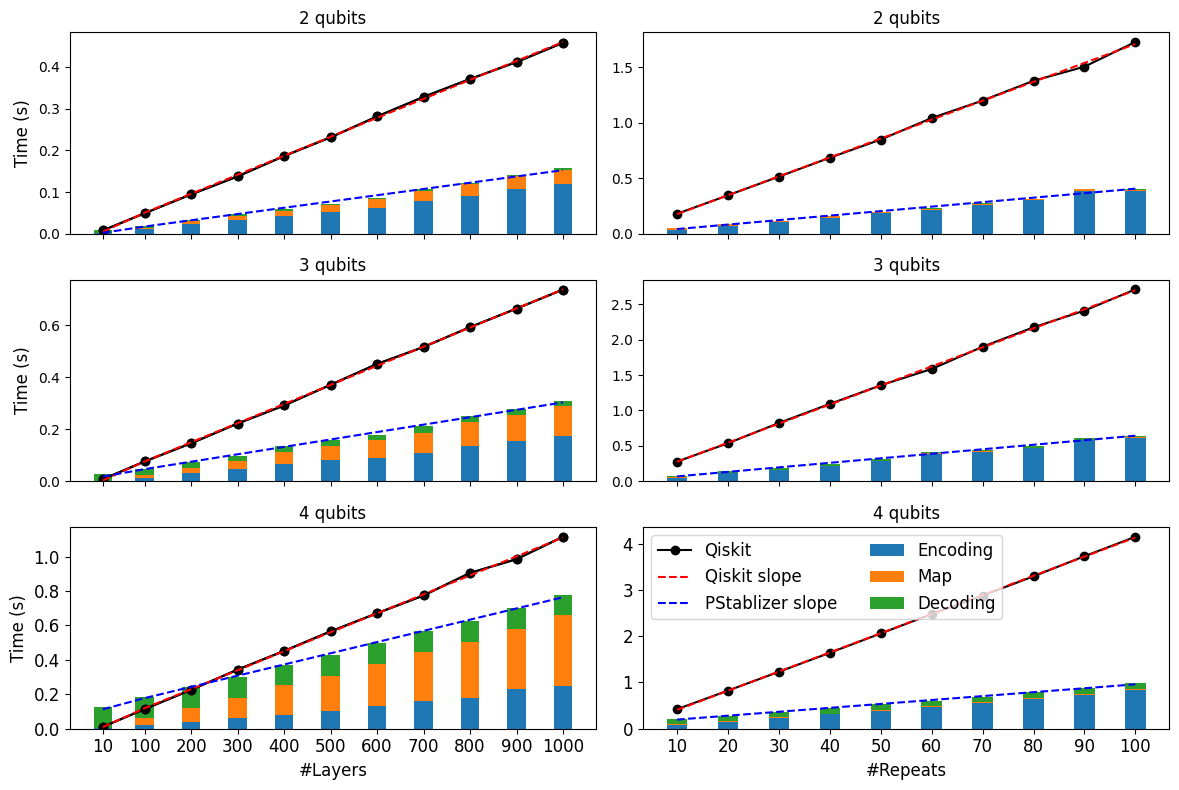

In [3]:
num_qubits = 4
num_layers = 10
stages = ['lut', 'mapping', 'mp']
labels = ['Encoding', 'Map', 'Decoding']
num_layers = [10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
fig, axs = plt.subplots(3,2, figsize=(12, 8))
width = 20

def return_slope(y):
    from scipy.stats import linregress
    x = np.arange(len(y))
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    y_pred = slope * x + intercept
    return y_pred, slope

for i in [0,1,2]:
    i_col = i % 3
    i_row = i // 3
    num_qubits = i + 2
    datas = np.zeros((len(stages), len(num_layers)))
    data_qiskit = []
    for k, stage in enumerate(stages):
        for j, num_layer in enumerate(num_layers):
            data = np.loadtxt(f"./data/times_{stage}_{num_qubits}qubit_{num_layer}layer.csv")
            if stage == 'mapping':
                kmax = int(256/num_qubits)
                if kmax < 4**num_qubits:
                    kmax = min(4**num_qubits, kmax)
                datas[k, j] = np.mean(data) / kmax
            else:
                datas[k, j] = np.mean(data)
    for j, num_layer in enumerate(num_layers):
        data = np.loadtxt(f"./data/times_qiskit_{num_qubits}qubit_{num_layer}layer.csv")
        data_qiskit.append(np.mean(data))
    bottom = np.zeros(len(num_layers))
    for k, stage in enumerate(stages):
        axs[i_col, i_row].bar(num_layers, datas[k, :], width = 40, label=labels[k], bottom=bottom)
        bottom += datas[k, :]
    # print('qubit', num_qubits)
    # print("qiskit", data_qiskit[-1])
    # print(bottom[-1])
    axs[i_col, i_row].plot(num_layers, data_qiskit, '-ro', label='qiskit', color='black')
    axs[i_col, i_row].plot(num_layers, data_qiskit, '-ro', label='Qiskit', color='black')
    qiskit_slope, slope = return_slope(data_qiskit)
    print("Slope qiskit", np.round(slope,2))
    axs[i_col, i_row].plot(num_layers, qiskit_slope, '--', color='red', label='Qiskit slope')
    bottom_slope, slope = return_slope(bottom)
    print("Slope stabilizer", np.round(slope,2))
    axs[i_col, i_row].plot(num_layers, bottom_slope, '--', color='blue', label='PStablizer slope')
    #axs[i_col, i_row].set_yscale('log')
    axs[i_col, i_row].set_title(f"{num_qubits} qubits", fontsize=12)
    if i_col == 2:
        axs[i_col, i_row].set_xlabel("#Layers", fontsize=12)
        axs[i_col, i_row].set_xticks(num_layers)
        axs[i_col, i_row].tick_params(axis='y', labelsize=12)
        axs[i_col, i_row].set_xticklabels(num_layers, fontsize=12)
    else:
        axs[i_col, i_row].set_xticks(num_layers)
        axs[i_col, i_row].set_xticklabels([])
    if i_row == 0:
    	axs[i_col, i_row].set_ylabel("Time (s)", fontsize=12)

num_repeats = range(10, 110, 10)
for i in [3,4,5]:
    i_col = i % 3
    i_row = i // 3
    num_qubits = i - 1
    datas = np.zeros((len(stages), len(num_repeats)))
    data_qiskit = []
    for k, stage in enumerate(stages):
        for j, num_repeat in enumerate(num_repeats):
            data = np.loadtxt(f"./data/times_{stage}_{num_qubits}qubit_{num_repeat}repeatlayer.csv")
            if stage == 'mapping':
                kmax = int(256/num_qubits)
                if kmax > 4**num_qubits:
                    kmax = min(4**num_qubits, kmax)
                datas[k, j] = np.mean(data) / kmax
            else:
                datas[k, j] = np.mean(data)
    for j, num_repeat in enumerate(num_repeats):
        data = np.loadtxt(f"./data/times_qiskit_{num_qubits}qubit_{num_repeat}repeatlayer.csv")
        data_qiskit.append(np.mean(data))
    bottom = np.zeros(len(num_repeats))
    for k, stage in enumerate(stages):
        axs[i_col, i_row].bar(num_repeats, datas[k, :], width = 4, label=labels[k], bottom=bottom)
        bottom += datas[k, :]
    print('qubit', num_qubits)
    print("pstabilizer.info", bottom[-1])
    print("qiskit", data_qiskit[-1])
    axs[i_col, i_row].plot(num_repeats, data_qiskit, '-ro', label='Qiskit', color='black')
    qiskit_slope, slope = return_slope(data_qiskit)
    print("Slope qiskit", np.round(slope,2))
    axs[i_col, i_row].plot(num_repeats, qiskit_slope, '--', color='red', label='Qiskit slope')
    bottom_slope, slope = return_slope(bottom)
    axs[i_col, i_row].plot(num_repeats, bottom_slope, '--', color='blue', label='PStablizer slope')
    print("Slope stabilizer", np.round(slope,2))
    #axs[i_col, i_row].set_yscale('log')
    
    axs[i_col, i_row].set_title(f"{num_qubits} qubits")
    if i_col == 2:
        axs[i_col, i_row].set_xlabel("#Repeats", fontsize=12)
        axs[i_col, i_row].set_xticks(num_repeats)
        axs[i_col, i_row].tick_params(axis='y', labelsize=12)
        axs[i_col, i_row].set_xticklabels(num_repeats, fontsize=12)
    else:
        axs[i_col, i_row].set_xticks(num_repeats)
        axs[i_col, i_row].set_xticklabels([])
    if i_row == 0:
    	axs[i_col, i_row].set_ylabel("Time (s)", fontsize=12)
plt.legend(fontsize = 12, ncol = 2)
plt.tight_layout()
#plt.savefig("./images/times2.svg")

In [7]:
4.148044276237488/0.978956364095211


4.237210593212977

In [5]:
import os
# RUN AGAIN FOR NEW DATA
data_folder = './data'
data_files = [f for f in os.listdir(data_folder) if os.path.isfile(os.path.join(data_folder, f))]

for file in data_files:
	file_path = os.path.join(data_folder, file)
	# data_dict[file] = np.loadtxt(file_path)
	data = np.loadtxt(file_path)
	if data.shape[0]>10:
		np.savetxt(file_path, data[-10:])

In [6]:
0.1193+4.3812/64+0.00355

0.19130625